# <center> <font color='green'>GRIP :THE SPARKs FOUNDATION</font></center>

# <center><font color='green'>Data Science and Business Analytics Intern</font></center>

# <center><font color="green">Author : ABHISHEK RAUNIYAR</font></color>

# <center><font color="green">Task (3) :  Prediction Of Areas for Increasing Profit And Analyse The Business Problem</font></color>

In this task we have to find weak areas of business where we can work to increase profit and also find what business problem occurs.

<center><img src='https://infoguidenigeria.com/wp-content/uploads/2022/12/Duties-of-a-Manager.jpg'></center>

# TABLE CONTENT
1.   [Importing Libarires](#imp)
2.   [Read Data Set](#rea)
3.   [Cleaning The Data Set](#clea)
4.  [Analyse profit and Category Column](#pcc)
5.   [Analyse profit and Region Column](#prc)
6.   [Analyze Segment and Profit Column ](#psc)
7.  [ Analyze Ship Mode and Profit Column](#psmc)
8.  [Conclusion](#ccc)

# STEP:-1 IMPORTING LIBARIRES<a class='anchor' id='imp'></a>

In [1]:
#for handling warnings 
import warnings
warnings.filterwarnings('ignore')

# Standard library
import numpy as np
import pandas as pd 

# for visualization
import matplotlib.pyplot as plt
import seaborn as sng

# STEP:-2 READ DATA SET<a class='anchor' id='rea'></a>

In [2]:
# Read data set
data=pd.read_csv("SampleSuperstore.csv")
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
## To find number of rows and columns
print('Shape of the data set is :',data.shape)

Shape of the data set is : (9994, 13)


In [4]:
#To find information of the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
## Checking the null values
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In given data set there is no null values.

In [6]:
# Now we check in each categorical column how many times each quantity appear in data set.
a=data.columns
for i in a[0:-4]:
    print("Frequency of each different item in column {} in given data set:-".format(i))
    print(data[i].value_counts())
    print("==========================")

Frequency of each different item in column Ship Mode in given data set:-
Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64
Frequency of each different item in column Segment in given data set:-
Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64
Frequency of each different item in column Country in given data set:-
Country
United States    9994
Name: count, dtype: int64
Frequency of each different item in column City in given data set:-
City
New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: count, Length: 531, dtype: int64
Frequency of each different item in column State in given data set:-
State
California              2001
New York                1128
Texas    

# Step:-3 Cleaning the data set<a class='anchor' id='clea'></a>

In [7]:
# Checking the different country name
data["Country"].unique()

array(['United States'], dtype=object)

The above data set is given for only United-States.


Thus we can delete  Country Column from given data set because it not play any role in analyzing the data set.

In [8]:
# Deleting the country column
del data["Country"]

In [9]:
# Here postal code is unique for each city .
# Thus we delete postal code column from given data set . we analyze through city column instead of Postal Code.
del data["Postal Code"]

In [32]:
# Read Data set
data.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Step:-4 Analyse profit and Category Column<a class='anchor' id='pcc'></a>

In [10]:
### Listing the each item in  Category column of the given data-set.
data['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [11]:
### write each item in the from of list name as cs
cs=list(data["Category"].unique())
cs

['Furniture', 'Office Supplies', 'Technology']

In [12]:
### Find the total profit of each item in Category column of the given data-set.
ls=[]      ### creating the empty list name as ls
for i in cs:
  a=data[data['Category']==i]
  print('for',i,'total profit is',a['Profit'].sum())  #### print profit of each item of category column.
  ls.append(a['Profit'].sum())    ### here we append the profit in list ls
print('Minimum profit gain is',min(ls))    #### print the minimum profit of item.

for Furniture total profit is 18451.272800000006
for Office Supplies total profit is 122490.8008
for Technology total profit is 145454.9481
Minimum profit gain is 18451.272800000006


<Axes: xlabel='Category'>

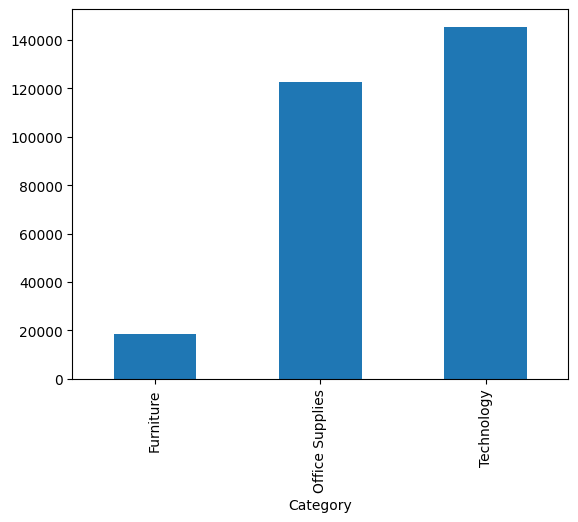

In [13]:
### Here we visualize profit of each item by bar graph.
data.groupby("Category").sum()["Profit"].plot(kind="bar")

<font color='green'>From above we conclude we have to work on increasing the sales of Furniture for making more profit.

# Step:-5 Analyse Profit and Region Column<a class='anchor' id='prc'></a>

In [14]:
### Listing the each item in  Region column of the given data-set.
data['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [15]:
### write each item in the from of list name as rs
rs=list(data["Region"].unique())
rs

['South', 'West', 'Central', 'East']

In [16]:
### Find the total profit of each item in Region column of the given data-set.
ls=[]      ### creating the empty list name as ls
for i in rs:
  a=data[data['Region']==i]
  print('for',i,'total profit is',a['Profit'].sum())  #### print profit of each item of Region column.
  ls.append(a['Profit'].sum())    ### here we append the profit in list ls
print('Minimum profit gain is',min(ls))    #### print the minimum profit of item.

for South total profit is 46749.4303
for West total profit is 108418.4489
for Central total profit is 39706.3625
for East total profit is 91522.78
Minimum profit gain is 39706.3625


<Axes: xlabel='Region'>

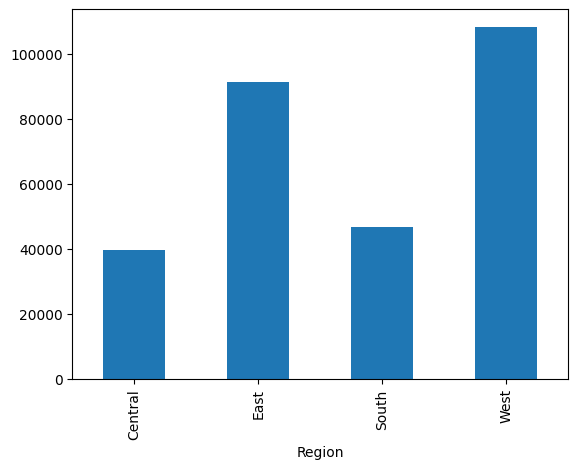

In [17]:
### Here we visualize profit of each item by bar graph.
data.groupby("Region").sum()["Profit"].plot(kind="bar")

<font color='green'>From above we conclude we have to work on increasing the sales in central and south area for making more profit.

Now we find profit of each item of category column in each region of region column.

In [18]:
for i in cs:
   print('for',i,'profit in different region:-')
   df=data[data['Category']==i]
   print(df.groupby('Region').sum()['Profit'])
   print('='*50)

for Furniture profit in different region:-
Region
Central    -2871.0494
East        3046.1658
South       6771.2061
West       11504.9503
Name: Profit, dtype: float64
for Office Supplies profit in different region:-
Region
Central     8879.9799
East       41014.5791
South      19986.3928
West       52609.8490
Name: Profit, dtype: float64
for Technology profit in different region:-
Region
Central    33697.4320
East       47462.0351
South      19991.8314
West       44303.6496
Name: Profit, dtype: float64


<font color='green'> From here we conclude that he must increase  sales in central region for furniture  for making more profit and also he must do advertisment for the product for increasing sales.

<font color="green"> Thus We Conclude:-  First he must increase sales of furniture in central areas.

# Step:-6 Analyze Segment and Profit Column <a class='anchor' id='psc'>

In [19]:
### Listing the each item in  Segment column of the given data-set.
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [20]:
### write each item in the from of list name as ss
ss=list(data["Segment"].unique())
ss

['Consumer', 'Corporate', 'Home Office']

In [21]:
### Find the total profit of each item in Segment column of the given data-set.
ls=[]      ### creating the empty list name as ls
for i in ss:
  a=data[data['Segment']==i]
  print('for',i,'total profit is',a['Profit'].sum())  #### print profit of each item of Segment column.
  ls.append(a['Profit'].sum())    ### here we append the profit in list ls
print('Minimum profit gain is',min(ls))    #### print the minimum profit of item.

for Consumer total profit is 134119.2092
for Corporate total profit is 91979.13399999999
for Home Office total profit is 60298.678499999995
Minimum profit gain is 60298.678499999995


<Axes: xlabel='Segment'>

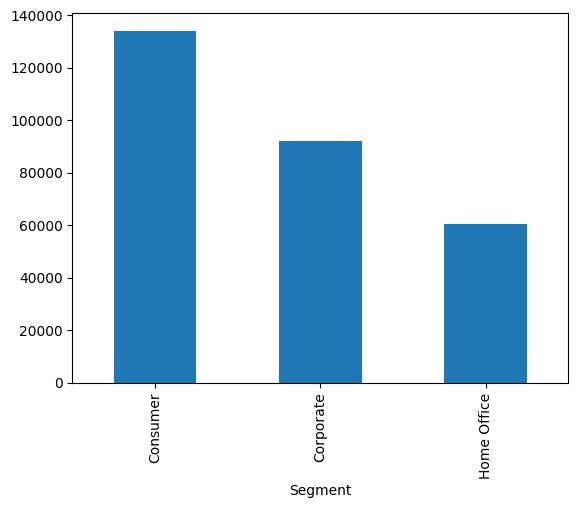

In [22]:
### Here we visualize profit of each item by bar graph.
data.groupby("Segment").sum()['Profit'].plot(kind='bar')

Now we find profit of each item of category column in each segment of segment column.

In [23]:
for i in cs:
   print('for',i,'profit in different segment:-')
   df=data[data['Category']==i]
   print(df.groupby('Segment').sum()['Profit'])
   print('===============================')

for Furniture profit in different segment:-
Segment
Consumer       6991.0786
Corporate      7584.8158
Home Office    3875.3784
Name: Profit, dtype: float64
for Office Supplies profit in different segment:-
Segment
Consumer       56330.3210
Corporate      40227.3202
Home Office    25933.1596
Name: Profit, dtype: float64
for Technology profit in different segment:-
Segment
Consumer       70797.8096
Corporate      44166.9980
Home Office    30490.1405
Name: Profit, dtype: float64


Here we observe in all category from home office(refer government department in united kingdom) we get less profit.

In [33]:
 ### Find the total profit of each item in Segment column of the given data-set using group by function.
data.groupby("Segment").sum()['Profit']

Segment
Consumer       134119.2092
Corporate       91979.1340
Home Office     60298.6785
Name: Profit, dtype: float64

<font color="green"> From here we conclude that he must work on home office segment (which refer government department in united kingdom)  for gaining more profit.

<font color="green">For this he made some aggrement with government department for the business which comes as a problem in front of business manger.

<font color="green"> Thus We Conclude:-  We have to increase sales in home office and for this we have to make some contract with government depatment (Home Office).

# Step:-7 Analyze Ship Mode and Profit Column<a class='anchor' id='psmc'>

In [25]:
### Listing the each item in  Ship Mode column of the given data-set.
df['Ship Mode'].unique()

array(['Standard Class', 'Second Class', 'First Class', 'Same Day'],
      dtype=object)

In [26]:
### write each item in the from of list name as sm
sm=list(data["Ship Mode"].unique())
sm

['Second Class', 'Standard Class', 'First Class', 'Same Day']

In [27]:
### Find the total profit of each item in Ship Mode column of the given data-set.
ls=[]      ### creating the empty list name as ls
for i in sm:
  a=data[data['Ship Mode']==i]
  print('for',i,'total profit is',a['Profit'].sum())  #### print profit of each item of Ship Mode column.
  ls.append(a['Profit'].sum())    ### here we append the profit in list ls
print('Minimum profit gain is',min(ls))    #### print the minimum profit of item.

for Second Class total profit is 57446.63540000001
for Standard Class total profit is 164088.7875
for First Class total profit is 48969.8399
for Same Day total profit is 15891.7589
Minimum profit gain is 15891.7589


<Axes: xlabel='Ship Mode'>

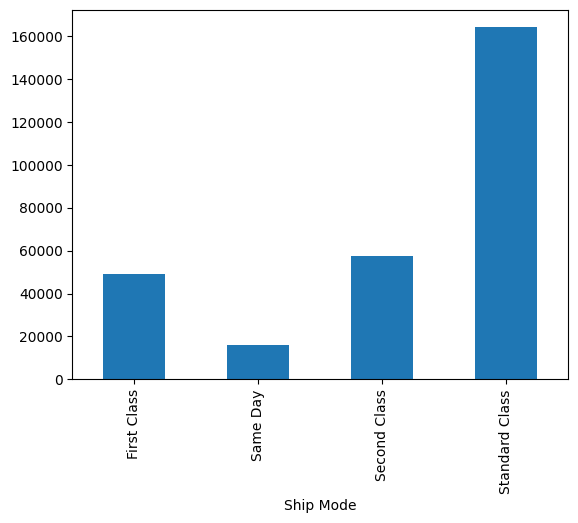

In [28]:
### Here we visualize profit of each item by bar graph.
data.groupby("Ship Mode").sum()["Profit"].plot(kind="bar")

In [29]:
data.groupby("Ship Mode").sum()["Profit"]

Ship Mode
First Class        48969.8399
Same Day           15891.7589
Second Class       57446.6354
Standard Class    164088.7875
Name: Profit, dtype: float64

In [30]:
### Find the total no of item in each entity of Ship Mode column of the given data-set.
ls=[]      ### creating the empty list name as ls
for i in sm:
  a=data[data['Ship Mode']==i]
  print('In',i,'total item deliver is',a['Ship Mode'].count())  #### print profit of each item of Ship Mode column.
  ls.append(a['Ship Mode'].count())    ### here we append the profit in list ls
print('Minimum item deliver is',min(ls))    #### print the minimum profit of item.

In Second Class total item deliver is 1945
In Standard Class total item deliver is 5968
In First Class total item deliver is 1538
In Same Day total item deliver is 543
Minimum item deliver is 543


In [31]:
### Here we find profit per unit item for each entity in ship mode column.
for i in sm:
    print('for',i,'total profit is :',end='')
    df=data[data['Ship Mode']==i]
    print((df['Profit'].sum())/len(df))
    

for Second Class total profit is :29.53554519280206
for Standard Class total profit is :27.494770023458447
for First Class total profit is :31.839947919375813
for Same Day total profit is :29.266590976058932


<font color='green'>Here we conclude from above data if company have more ship mode in first class then he make more profit.

# Step:-8 Conclusion<a class='anchor' id='ccc'>

#### <font color="green">(1)Finally we conclude for making more profit we have to work on increaing sales of furniture mainly in central region.

#### <font color='green'>(2)For getting more profit he must deliver more item in first class ship mode and also we have to increase number of first class ship mode which comes as a problem for business manger.

#### <font color='green'>(3)Also for getting more profit we have to increase sales in home office segment for this we have to do some business contract with the concern government department which comes as a problem for business manger.